In [1]:
from graph_tool.all import *

In [2]:
from collections import namedtuple
from numpy import array

from graph_tool.all import *

RMAX = 10. # limit field of view for testing

# generate a direted graph 
g = Graph(directed=True)

# load all cobra positions in the PFI focal plane
Cobra = namedtuple('Cobra', ['id','x', 'y', 'vertex_index'], verbose=False)
ffiberpos = "data/fiberpos.txt"
cobras = {}
with open(ffiberpos) as f:
    ll = f.readlines()
    for l in ll[1:]:
        tt = l.replace(":","").split()
        x,y = float(tt[1]),float(tt[2])
        if x**2 + y**2 > RMAX**2:
            continue
        v = g.add_vertex()
        c = Cobra(id=str(tt[0]),x=x,y=y,vertex_index=g.vertex_index[v])
        cobras[tt[0]] = c

In [3]:
# load all target positions in the PFI focal plane
Target = namedtuple('Target', ['id','x', 'y', 'vertex_index'], verbose=False)
ftarget = "data/target.txt"
targets = {}
with open(ftarget) as f:
    ll = f.readlines()
    for i,l in enumerate(ll[1:]):
        tt = l.replace(":","").split()
        x,y = float(tt[1]),float(tt[2])
        if x**2 + y**2 > RMAX**2:
            continue
        v = g.add_vertex()
        c = Target(id=str(tt[0]),x=x,y=y,vertex_index=g.vertex_index[v])
        targets[tt[0]] = c

In [4]:
# load information on which cobra can access which target
# and add corresponding edges
fvisibility = "data/visibility.txt"
with open(fvisibility) as f:
    ll = f.readlines()
    for i,l in enumerate(ll[1:]):
        tt = l.replace(":","").split()
        tid = str(tt[0])
        cobra_ids = [str(t) for t in tt[1:]]
        if not targets.has_key(tid):
            continue
        v2id = targets[tid].vertex_index
        v2 = g.vertex( v2id )
        for cid in cobra_ids:
            if not cobras.has_key(cid):
                continue
            v1id = cobras[cid].vertex_index
            v1 = g.vertex(v1id)
            e = g.add_edge(v1, v2)

In [116]:
#import matplotlib.pyplot as plt
#%matplotlib inline

In [117]:
#f = plt.figure(figsize=[10,10])
#plt.plot([cobras[c].x for c in cobras],[cobras[c].y for c in cobras],'.')

#plt.plot([targets[t].x for t in targets],[targets[t].y for t in targets],'rx')

#plt.axis('equal')
#plt.xlabel('x')
#plt.ylabel('y')
#plt.xlim([-50,50])
#plt.ylim([-50,50])

In [5]:
#pos = sfdp_layout(g)
pos = g.new_vertex_property("vector<double>")
vt = g.new_vertex_property("double")
vt[g.vertex(0)] = 0. # source node color
vt[g.vertex(1)] = 1. # sink node color
pos[g.vertex(0)] = -RMAX,0. # source node positions
pos[g.vertex(1)] = +RMAX,0. # sink node positions

In [6]:
# set node positions
for cid,c in cobras.iteritems():
    pos[g.vertex(c.vertex_index)] = (c.x, c.y)
    vt[g.vertex(c.vertex_index)] = 2.
    
for tid,t in targets.iteritems():
    pos[g.vertex(t.vertex_index)] = (t.x, t.y)
    vt[g.vertex(t.vertex_index)] = 3.

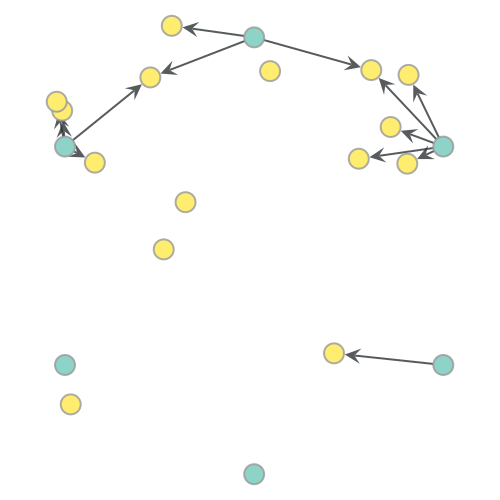

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x11fa6d6d0, at 0x11fa6f790>

In [7]:
#graph_draw(g, pos=pos,vertex_text=g.vertex_index, vertex_fill_color=vt, vertex_font_size=8, vertex_size=25,
#           output_size=(5000, 5000), output="pfi.pdf")

output = None
#output="pfi.pdf"
graph_draw(g, pos=pos,vertex_fill_color=vt, vertex_size=20,
           output_size=(500, 500), output=output)

In [80]:
pos_sfdp = planar_layout(g)

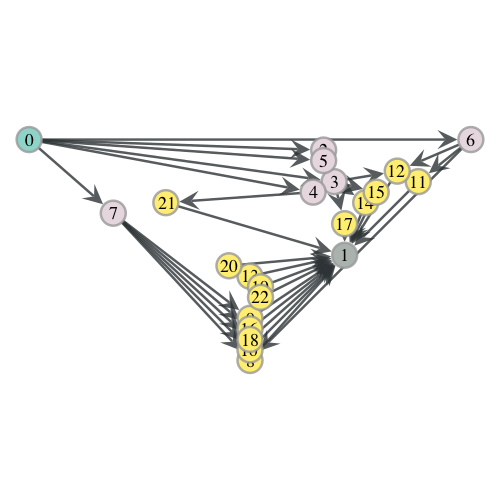

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x11ef97450, at 0x11ef97a10>

In [81]:
#pos_sfdp[g.vertex(0)] = +RMAX,0. # source node positions
#pos_sfdp[g.vertex(1)] = -RMAX,0. # sink node positions

graph_draw(g, pos=pos_sfdp,vertex_text=g.vertex_index, vertex_fill_color=vt, vertex_font_size=18, vertex_size=25,
           output_size=(500, 500))